# Evaluation Metrics

### Learning Objectives:
- [Evaluation metrics: why do we need them?](#Evaluation-metrics:-why-do-we-need-them?)
- [Classification Metrics](#Classification-Metrics)
- [Regression Metrics](#Regression-Metrics)
- [Extra: ROC & AUC](#Extra:-ROC-&-AUC)

# Evaluation metrics: why do we need them?

__Evaluation metrics__, as the name suggests, are metrics used to measure the performance of a model or algorithm. There are multiple evaluation metrics out there. Certain metrics can only be used for certain types of models and different metrics can be used to evaluate different aspects of performance. Therefore, the optimal metric will vary depending on your model, your data and your aim.

Why do we need these metrics in the first place? Well, building models is works on a constructive feedback principle. We build a model, get feedback from metrics, make improvements and carry on until we have reached our desired performance. By evaluating our model over multiple (appropriate) metrics, not only can we ensure that it is robust, but we can also optimise our models to different aspects of performance.

# Classification Metrics

In any classification problem, we aim to predict the category of a given observation based on the general properties of a training data set. In this context, the simplest way to measure performance, whether with binary or multiclass classification, is to measure the number of correct and incorrect predictions. But we can do better than that. Let us start with the simple case of binary classification.

If we consider out of the two categories one to be 'Positive' and the other to be 'Negative', we can derive evaluation metrics that measure more specific aspects of performance by categorizing the prediction outcome under the following four categories:
- __True positive:__ Where the model predicts the label to be 'Positive' and the true label is 'Positive'
- __True negative:__ Where the model predicts the label to be 'Negative' and the true label is 'Negative'
- __False positive:__ Where the model predicts the label to be 'Positive' and the true label is 'Negative'
- __False negative:__ Where the model predicts the label to be 'Negative' and the true label is 'Positive'

These outcomes can be displayed in tabular form, in what is known as a __confusion matrix,__ as shown below:
<img src="https://glassboxmedicine.files.wordpress.com/2019/02/confusion-matrix.png?w=816" width="500px" height="500px">

[Source:](https://glassboxmedicine.com/2019/02/17/measuring-performance-the-confusion-matrix/)

The values that go in each cell can either be the absolute frequency of that class (e.g. actual number of false positives), or the normalized value by either the true row or predicted columns. While we generally use the non-normalized form for calculations, the normalized form can be useful to giving us some intuition of the proportions of each cell. 

From this grouping of the possible outcomes of a binary prediction, we can come up with useful metrics which we are about to go over. Below, we are loading in the breast cancer dataset which we will fit a Logistic Regression classification model (benign vs malignant), and will apply our metrics to it. We will then later see how to elaborate and generalize these metrics to multiclass classification models.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection
from sklearn.metrics import plot_confusion_matrix

# Loading in breast cancer data
X, Y = datasets.load_breast_cancer(return_X_y=True)
Y = [int(not bool(y)) for y in Y] # Setting malignant tumours to be considered "Positive"
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.30, random_state=0)

True Confusion Matrix:
Normalized Confusion Matrix:


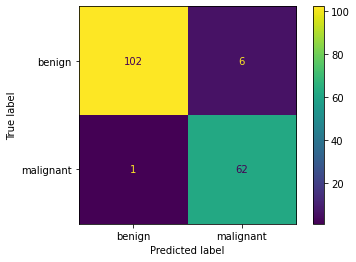

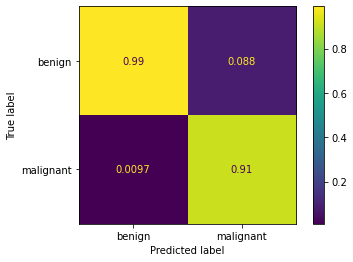

In [38]:
from sklearn.linear_model import LogisticRegression, LinearRegression

# Fitting logistic regression model to the data
myLogisticModel = LogisticRegression(random_state=0, max_iter=10000).fit(X_train, Y_train)
y_hat = myLogisticModel.predict(X_test)

# Displaying Confusion matrix
print("True Confusion Matrix:")
plot_confusion_matrix(myLogisticModel, X_test, Y_test, display_labels=["benign", "malignant"])
print("Normalized Confusion Matrix:")
plot_confusion_matrix(myLogisticModel, X_test, Y_test, normalize='pred', display_labels=["benign", "malignant"])

## Accuracy

The simplest, and one of the most widely used classification evaluation metrics is the __accuracy__ of the model, which is the ratio of the correct predictions to the total number of predictions. It is defined as follows:

$$ \text{Accuracy} = \frac{\text{True positives + True negatives}}{\text{True positives + True negatives + False positives + False negatives}} = \frac{\text{correct predictions}}{\text{all predictions}}$$

Accuracy is intuitive, which is always useful, and high accuracy will often be a good signifier of high performance. However, if the data is not very symmetric and the cost of false negatives and false positives are not similar, then accuracy may not be the best metric to evaluate the performance of our model. This will become clearer with the examples we are about to cover. Below, we show how to compute accuracy with Python and the in-built scikit-learn function.

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Computing the accuracy of our logistic regression model
def accuracy(labels, predictions):
    return np.mean((predictions == labels).astype(int))

print("Accuracy (Python):", accuracy(Y_test, y_hat))
print("Accuracy (scikit-learn)", accuracy_score(Y_test, y_hat))

Accuracy (Python): 0.9590643274853801
Accuracy (scikit-learn) 0.9590643274853801


According to our first evaluation metric, our model seems to have a good performance.

## Precision

__Precision__ is another commonly used evaluation metric. It is defined as the ratio of correctly predicted positives to the total number of predicted positives, as shown by the equation below:

$$ \text{Precision} = \frac{\text{True positives}}{\text{True positives + False positives}}$$

Precision is the answer to the question: "out of all the times we predicted the brain cancer to be malignant, how many times was it actually malignant?". It is an important measure to have to ensure we evaluate the performance of our model appropriately. It is a useful metric to consider when false positives are costly. For instance, if we are building a system to predict if we should decrease the credit limit on a particular account, we want to be very sure about our prediction or it may result in customer dissatisfaction. In this context, precision is a very relevant measure of performance.

__Thought experiment:__ Consider our current dataset, and assume that 560 of the patients have a benign tumour and 9 patients have a malignant tumour. If we create a model that always predicts the tumour to be benign (negative), we get an accuracy of $\frac{560}{569} = 98.4\%$, which suggests that our model performed well. We know that the model designed is poor, which once again reflects the fact that accuracy is a poor metric under a non-symmetric distribution for our data. What would the precision in this case be? Since we have no true positives nor false positives, our precision is undefined, which highlights the poor performance of the model. Just as with accuracy, we want precision to be as close to 1 as possible.

Below, we compute the precision of our model using Python and the in-built function in scikit-learn. 

In [40]:
# Computing precision
def precision(labels, predictions):
    tp = 0
    fp = 0
    for label, prediction in zip(labels, predictions):
        if prediction == 1:
            if label == 1:
                tp += 1
            else:
                fp += 1
    return tp / (tp + fp)

print("Precision (Python):", precision(Y_test, y_hat))
print("Precision (scikit-learn)", precision_score(Y_test, y_hat))

Precision (Python): 0.9117647058823529
Precision (scikit-learn) 0.9117647058823529


According to another metric, our model still exhibits high levels of performance. By validating our models with multiple (appropriate) metrics, we can ensure the model is robust.

# Recall

Another useful evaluation metric for classification models is the __recall__, also known as __sensitivity,__ which is the ratio of the correctly predicted positives to the total number of positives in the dataset. It is given by the following equation:

$$\text{Recall} = \frac{\text{True positive}}{\text{True positive + False negative}}$$

While precision measures how well our model deals with false positives, recall now measures how well it deals with false negatives! Together, accuracy, recall and precision are robust metrics for performance evaluation. It is a useful measure to consider when false negatives are more costly than false positives. For instance, it is probably better that a tumour is classified as malignant even though it is not, as it will lead to further examination, than if a malignant tumour were to be classified as benign, leading to a sick person not receiving treatment.

__Thought experiment:__ Consider the same extreme example from earlier with 560 benign tumours and 9 malignant tumours. What if now, we create a model that always predicts the tumour to be malignant (positive). The accuracy is now given by $\frac{9}{569} = 2\%$, the precision is given by $\frac{9}{569} = 2\%$, but the recall now is given by $\frac{9}{9} =100\%$. In the previous though-experiment, going with only accuracy would have led us to misjudge the performance of the model, just as now using only recall would have the same effect. Once again, using multiple appropriate metrics improves the robustness of our analysis.

Below we compute the recall of our breast cancer model using Python and the in-built function from scikit-learn.

In [41]:
# Computing recall of the logistic regression model
def recall(labels, predictions):
    tp = 0
    fn = 0
    for label, prediction in zip(labels, predictions):
        if label == 1:
            if prediction == 1:
                tp += 1
            else:
                fn += 1
    return tp / (tp + fn)

print("Recall (Python):", recall(Y_test, y_hat))
print("Recall (scikit-learn)", recall_score(Y_test, y_hat))

Recall (Python): 0.9841269841269841
Recall (scikit-learn) 0.9841269841269841


Which, once again, reflects that our model exhibits a strong performance. Using recall and precision in parallel is already a strong way of evaluation our model on its own. However, as they are two separate measures, we cannot use them directly to compare the performance of one model with another, so instead we must come up with a metric that accounts for both the recall __AND__ precision of our model simultaneously.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg" width="300px" height="300px">

## F1 Score

The $\mathbf{F_{1}}$ __score__, also known as the __F-score or __F-measure,__ is a metric that takes what is known as the harmonic mean of our precision and recall. Therefore by maximising the F1-score, we are accounting for both precision AND recall simultaneously. It is given as follows:

$$F_{1} = 2\cdot \frac{\text{precision . recall}}{\text{precision + recall}} = 
\frac{\text{True positive}}{\text{True positive} + \frac{1}{2}(\text{False positive + False negative})}$$

Given this measure, we have a robust measure of the performance of our model, which we can use to determine what aspects of our model are lacking, and which models outperforms the others. An extension of the $F_{1}$ score is known as the $F_{\beta}$ score, which for a given value for $\beta$ is given as follows:

$$F_{\beta} = (1+\beta^{2})\frac{\text{precision . recall}}{(\beta^{2}\cdot\text{precision) + recall}}$$

While we will not implement this version of the metric in this class, it can be useful as it enables you to give different weightings to the two metrics depending on the chosen parameter value for $\beta$. Depending on the context under which the model will be applied, you will need to optimise for different metrics. For example, when aiming to diagnose whether someone's breast cancer is malignant (positive) or benign (negative), it is much better to misdiagnose it as malignant (False positive), which would result in further testing, than to misdiagnose it as benign (False negative), and not treat someone with a deadly condition. In this context, you would choose to minimise the number of false negatives, hence give a higher weighting to your recall than your precision.

Below we implement the $F_{1}$ score with Python as well as with the in-built scikit-learn function.

In [42]:
# Computing F1 score
def f1(labels, predictions):
    p = precision(labels, predictions)
    r = recall(labels, predictions)
    return 2 * (p*r) / (p+r)

print("F1 score (Python):", f1(Y_test, y_hat))
print("F1 score (scikit-learn)", f1_score(Y_test, y_hat))

F1 score (Python): 0.9465648854961831
F1 score (scikit-learn) 0.9465648854961831


As shown by the four metrics we have used, our model exhibits a relatively high performance across all the different metrics, which reflects the robustness of the model.

But now some of you may be thinking: "How does any of this apply to the case of multiclass classification?". Well, you are in luck, as the same framework as we have seen above can also be applied to non-binary cases. We will demonstrate this using the iris dataset from scikit-learn, which we upload below and fit to a multiclass logistic regression model.

In [43]:
from sklearn.datasets import load_iris

# Loading iris dataset
iris = load_iris()
X = iris.data
Y = iris.target
class_names = iris.target_names

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.30, random_state=0)

In [44]:
# Fitting a logistic regression model to the iris dataset
irisLogisticModel = LogisticRegression(random_state=0, max_iter=10000).fit(X_train, Y_train)
y_hat = irisLogisticModel.predict(X_test)

The first thing we need to do is to be able to expand upon our confusion matrix so that it accounts for multiple classes rather than two. We do this by treating each individual class as a simple case of binary classification. Thanks to the in-built tools in scikit-learn, we are able to plot the confusion matrix of our iris dataset and corresponding model.

Confusion matrix
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


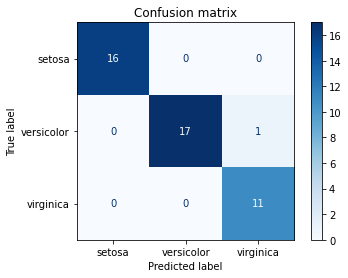

In [45]:
# Visualization of confusion matrix of iris dataset

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

class_names = iris.target_names

title = "Confusion matrix"
disp = plot_confusion_matrix(irisLogisticModel, X_test, Y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
disp.ax_.set_title(title)
print(title)
print(disp.confusion_matrix)

plt.show()

Now with the confusion matrix as a visual-aid, we can __'binarize'__ the problem and treat each class as a binary classification problem. For instance, we can compute the precision when classifying an observation as 'versicolor' or not as $\frac{17}{17} = 100\%$, to be $\frac{16}{16} = 100\%$ for 'setosa' and to be $\frac{11}{11 + 1} = 91.7\%$ for 'virgina'. Using these three metrics we can compute the average of the individual precisions to obtain the precision of the multiclassification model! We can generalize this concept and apply to the other metrics encountered. This is the simplest form of computing the multiclass precision and is known as __macro averaging,__ where all metrics have the same weight. For other forms of metric averaging, look [here](https://scikit-learn.org/stable/modules/model_evaluation.html). If we consider a multiclassification model with $N$ possible classes:

$$\text{Accuracy} = \frac{\text{correct predictions}}{\text{all predictions}}$$

$$\text{Precision} = \frac{1}{N}\sum_{i=i}^{N}(\text{Binary Precision})_{i} $$

$$\text{Recall} = \frac{1}{N}\sum_{i=i}^{N}(\text{Binary Recall})_{i} $$

The $F_{1}$ score metric can still be computed in terms of the recall and precision. Below we compute the four metrics encountered for our 'irisLogisticModel'. So that this does not become a 'black-box' concept for you, we have computed by hand the precision of our model based on the values on our confusion matrix.

$$\text{Precision} = \frac{1}{N}\sum_{i=i}^{N}(\text{Binary Precision})_{i} = \frac{1 + 1 + 0.917}{3} = 0.972 $$

In [46]:
# Computing multiclass classification Iris model metrics

print("Accuracy:", accuracy_score(Y_test, y_hat))
print("Precision:", precision_score(Y_test, y_hat, average="macro"))
print("Recall:", recall_score(Y_test, y_hat, average="macro"))
print("F1 score:", f1_score(Y_test, y_hat, average="macro"))

Accuracy: 0.9777777777777777
Precision: 0.9722222222222222
Recall: 0.9814814814814815
F1 score: 0.975983436853002


# Regression Metrics

Now that you are familiar with classification metrics, we can go over regression problems, which deal with numerical quantities rather than categorical ones. This simple fact means that the same evaluation metrics used in classification cannot be used for regression models. In classification metrics, we base all metrics on binary concepts such as 'correct' and 'incorrect', then binarize multiclass problems so that the same framework applies. But this does not work with regression models. For instance, under a classification frame of mind, if we predict an output of 3.29742 and the true label is 3.29741, this would be classified as incorrect. What is even worse is that other predictions that are much further away would have the same categorisation. 

Therefore, with regression metrics, __we do not focus on whether something is correct or incorrect, but rather focus on how similar to the true label our prediction is.__

For the purposes of this topic, we will use the boston house-prices dataset from scikit-learn and fit a linear regression to it.

In [47]:
# Loading boston dataset
X, Y = datasets.load_boston(return_X_y=True)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=0)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(354, 13) (354,) (152, 13) (152,)


In [48]:
# Fitting linear regression model
myLinearModel = LinearRegression().fit(X_train, Y_train)
y_hat = myLinearModel.predict(X_test)

## Mean Squared Error (MSE), Root Mean Square Error (RMSE) & Mean Absolute Error (MAE)
As seen previously, one metric that can be used to measure the performance of a regression model is the __mean square error (MSE),__ which is computed by finding the difference at every point between the prediction and label, squaring the difference, then taking the mean of all those square differences. We are interested in how much the prediction deviates from the label, not whether it's larger or smaller than the label, thus by squaring the errors we ensure that all terms have the same sign and the sum of any two terms can only increase our metric value. However, because it is measured in terms of the square of the original unit, a more commonly used evaluation metric is the __root mean square error (RMSE)__, which is the square root of the MSE. This is now measured in the same units as originally and thus becomes easier to interpret. They are given as follows for $N$ examples:

$$MSE = \frac{1}{N}\sum_{i=1}^{N}(y_{i} - \hat{y}_{i})^{2}$$
$$RMSE = \sqrt{MSE} = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(y_{i} - \hat{y}_{i})^{2}}$$

Below we show how these are implemented both through Python as well as the in-built scikit-learn functions:

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Computing MSE and RMSE
def MSE(labels, predictions):
    return np.mean(np.square(labels - predictions))
def RMSE(labels, predictions):
    return np.sqrt(MSE(labels, predictions))

print("MSE (Python):", MSE(Y_test, y_hat))
print("MSE (scikit-learn):", mean_squared_error(Y_test, y_hat))
print()
print("RMSE (Python):", RMSE(Y_test, y_hat))
print("RMSE (scikit-learn):", mean_squared_error(Y_test, y_hat, squared=False))

MSE (Python): 27.195965766883408
MSE (scikit-learn): 27.195965766883408

RMSE (Python): 5.214975145375423
RMSE (scikit-learn): 5.214975145375423


Another deviation from the MSE and RMSE is the known as the __mean absolute error (MAE)__, and is, simply put, the mean of the absolute value of the differences between every prediction and label. It is the most intuitive metric out of the three because all it means is "on average, what is the size of our deviation from the true values". Below, we show how it is computed with both Python and scikit-learn.

In [50]:
# Computing MAE for our Linear Model
def MAE(labels, predictions):
    return np.mean(np.abs(labels - predictions))

print("MAE (Python):", MAE(Y_test, y_hat))
print("MAE (scikit-learn):", mean_absolute_error(Y_test, y_hat))

MAE (Python): 3.6099040603818096
MAE (scikit-learn): 3.6099040603818096


So which is better: RMSE or MAE? The answer is that it depends on the context. Since we square the errors when computing the RMSE, we are automatically giving a higher weight to larger errors as opposed to the MAE, which only takes their absolute value. Consider the dummy example where we are handed a list of 10 errors below, where 2 of them are far larger than the rest.

In [53]:
# Dummy example
errors = np.array([1.0, -2.5, -1.2, 253.4, 5.3, -6.9, -3.2, -100.9, 4.7, 3.3])
print("MAE: ", np.mean(np.abs(errors)))
print("RMSE: ", np.sqrt(np.mean(np.square(errors))))

MAE:  38.24
RMSE:  86.32495583549407


From this dummy example, we can see that larger errors will make the RMSE much larger than the MAE. In fact, the larger our errors, the larger the RMSE will be in relation to the MAE. Thus, while the MAE is much more intuitive than the RMSE, the RMSE is quite useful for punishing the model for larger errors. Nowadays, since these calculations are not done by hand, there is often no reason why we cannot use both evaluation metrics in parallel.

## R-squared (Coefficient of Determination)
The __R-squared ($\mathbf{R^{2}}$)__ is the the proportion of variance in the output that we are able to predict from the input with our model. This evaluation metric is important as it tackles a different aspect of performance from its MSE, RMSE and MAE counterparts. We are interested in how much of the variance in the labels is explained by our model as the variation in our data is representative of the information it contains! If our model cannot account for the variance in our data, it is not painting the whole picture!

So how can we calculate the $R^{2}$ of our model? The $R^{2}$ is a percentage of the variance from the data that is explained by our model. To compute this, we first compute the variance of the model, which is equal to how much much our data deviates from the simplest possible model: the sample mean. We then compute the mean squared error, which tells us how much the data deviates from our model. We then use the following relationship:

$$R^{2} = 1 - \frac{MSE}{Var(y)} = 1 - \frac{\sum_{i=1}^{N}(y - \hat{y})^{2}}{\sum_{i=1}^{N}(y - \bar{y})^{2}}$$

Now we have a measure that will give us 0 if the model explains as much about the variability of the model as the sample mean, and 1 if it explains 100% of the variability in our data. Below we compute the $R^{2}$ using Python as well as with the in-built scikit-learn functions for our linear model.

In [52]:
# Computing R2
def R2(labels, predictions):
    return 1 - (MSE(labels, predictions)/np.var(labels))

print("R2 (Python):", R2(Y_test, y_hat))
print("R2 (scikit-learn):", r2_score(Y_test, y_hat))

R2 (Python): 0.6733825506400171
R2 (scikit-learn): 0.6733825506400171


According to this metric, our model is able to explain 67.3% of the variation in our data.

Now, besides the $R^{2}$, the other three metrics are no longer explained in terms of a percentage. How can we interpret our values for MSE, RMSE and MAE? This will depend on the model and the data you are dealing with. If you deviate by 0.7 on a dataset that varies from 0-1000, this is not a large deviation. However, if your data varies from 0-1, 0.7 is a significant deviation from the truth. Therefore, these metrics are useful for comparing different models on the same data. 

If we would like to compare the performance of two different regression models who's data are on different scales, it may be useful to normalize our evaluation metrics by the range of values in our data.

# Extra: ROC & AUC

We can now discuss one of the most powerful evaluation metrics used for classification: the __Receiver Operator Characteristic (ROC) curve__ and the __Area Under the Curve (AUC).__ By 'fitting' a logistic regression model to our binary classification data, we have already found the optimal 'threshold' for the model. In the case of our example, the threhsold is the probability where greater than this probability, we consider the tumour to be malignant, and below it, where the tumour is classified as benign. However, the 'optimal' threhsold may not necessarily give us the optimal model for the problem we are tackling, which is why we need evaluation metrics in the first place. 

Hence comes the ROC curve, originaly developed for operators of military radar receivers hence the name, gives us a visual representation of the performance of our model while operating at different thresholds. The ROC curve uses recall, referred to in this context as sensitivity or __true positive rate__, as well as another quantity, known as __specificity,__ which is the ratio of how many observations were correctly predicted negative to how many observations were actually negative:

$$ \text{Specificity} = \frac{\text{True negative}}{\text{True negative + False positive}}$$

Given this quantity, we can define what is known as the __false positive rate__, which tells you the proportion of observations that were predicted to be malignant when they were actually benign:

$$ \text{False positive rate} = 1-\text{Specificity} = \frac{\text{False positive}}{\text{True negative + False positive}} $$

Using these quantities, we can now plot our own ROC curve for our binary classification model, which is the true positive rate versus the false positive rate for all our threshold values tested!

In [ ]:
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and dashed linear curve
plot_roc_curve(myLogisticModel, X_test, Y_test)
plt.plot(np.linspace(0, 1, 1000), np.linspace(0, 1, 1000), linestyle='dashed')
plt.show()

What does this graph tell us? Well, let us first consider the straight line, which means true positive rate = false positive rate. This would mean that our model predicts as correct positives as it does false positives, which is far from an ideal case. Even further as an extreme, the bottom right or curve represents a true positive rate of 0 and a false positive rate of 1, which would mean that we have predicted 0 correct positives. On the other hand, the top left of the curve represents an ideal scenario, where we have 0% false positives and 100% true positives. Thus, what we can do is instead compute the __Area Under the Curve (AUC)__ of our ROC. The AUC metric is bouded between 0 (which would occur we have a point at the bottom right of the plot) and 1 (which would only occur if we a point at the top left). Again, this metric reflects the solid performance of our model!

In [ ]:
from sklearn.datasets import load_iris

# Loading iris dataset
iris = load_iris()
X = iris.data
Y = iris.target
class_names = iris.target_names

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.30, random_state=0)

In [ ]:
# Fitting a logistic regression model to the iris dataset
irisLogisticModel = LogisticRegression(random_state=0, max_iter=10000).fit(X_train, Y_train)
y_hat = irisLogisticModel.predict(X_test)

In [ ]:
# Visualization of confusion matrix of iris dataset

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

class_names = iris.target_names

title = "Confusion matrix"
disp = plot_confusion_matrix(irisLogisticModel, X_test, Y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
disp.ax_.set_title(title)
print(title)
print(disp.confusion_matrix)

plt.show()

In [ ]:
from sklearn.preprocessing import label_binarize

# Defining function for computing multiclass ROC-AUC score
def roc_auc_multiclass(labels, predictions):

    # Binarize the output
    labels = label_binarize(labels, classes=[0, 1, 2])
    predictions = label_binarize(predictions, classes=[0, 1, 2])
    n_classes = labels.shape[1]

    # Compute ROC area for each class
    roc_auc = [roc_auc_score(labels[:, i], predictions[:, i]) for i in range(n_classes)]
    return np.mean(roc_auc)

# Congratulations!